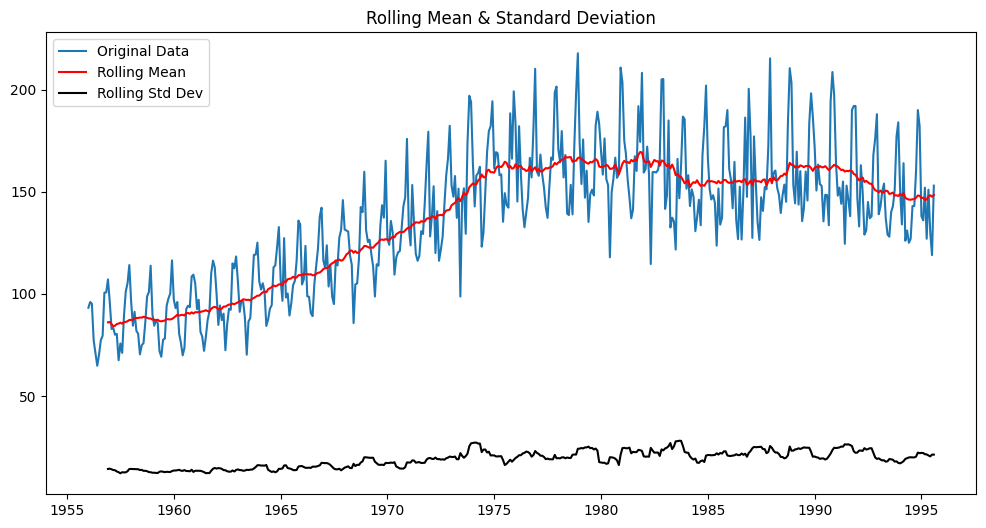

Results of Augmented Dickey-Fuller Test:
Test Statistic             -2.282661
p-value                     0.177621
# Lags Used                17.000000
Number of Observations    458.000000
Critical Value (1%)        -3.444709
Critical Value (5%)        -2.867871
Critical Value (10%)       -2.570142
dtype: float64
The data is non-stationary (fail to reject null hypothesis).


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def check_stationarity(file_path):
    # Load dataset
    df = pd.read_csv(file_path)
    df['Month'] = pd.to_datetime(df['Month'])
    df.set_index('Month', inplace=True)

    # Rename column for easier access
    column_name = df.columns[0]
    df.rename(columns={column_name: 'Beer_Production'}, inplace=True)

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    rolling_mean = df['Beer_Production'].rolling(window=12).mean()
    rolling_std = df['Beer_Production'].rolling(window=12).std()
    plt.plot(df['Beer_Production'], label='Original Data')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='black')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print("Results of Augmented Dickey-Fuller Test:")
    adf_test = adfuller(df['Beer_Production'])
    output = pd.Series(adf_test[:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations'])
    for key, value in adf_test[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)

    # Interpret results
    if adf_test[1] <= 0.05:
        print("The data is stationary (reject null hypothesis).")
    else:
        print("The data is non-stationary (fail to reject null hypothesis).")

# Run the function
check_stationarity("/content/monthly-beer.csv")
